In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
model = GaussianNB()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
ms = MinMaxScaler()

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

In [13]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
X = df.drop('species',axis=1)

In [16]:
y = df['species']

In [17]:
df['species'] = le.fit_transform(df['species'])

In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [20]:
#ms = MinMaxScaler()

In [21]:
X_train = ms.fit_transform(X_train)

In [22]:
X_test = ms.fit_transform(X_test)

In [23]:
#model = GaussianNB()

In [24]:
model.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array(['virginica', 'setosa', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
acc = accuracy_score(y_test,y_pred)
acc

0.9666666666666667

In [28]:
error_rate = 1 - acc
error_rate

0.033333333333333326

In [29]:
pre = precision_score(y_test,y_pred,average='macro')
pre

0.9761904761904763

In [30]:
rec = recall_score(y_test,y_pred,average='macro')
rec

0.9444444444444445

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])

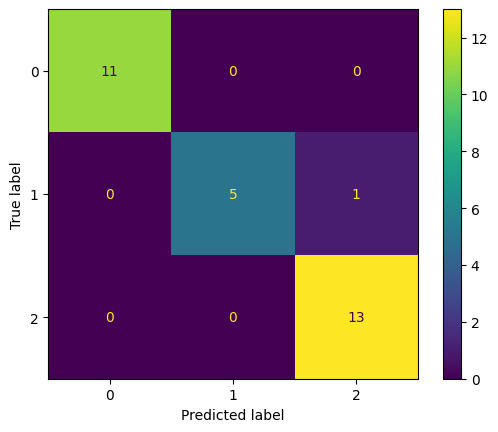

In [32]:
desc = ConfusionMatrixDisplay(cm)
desc.plot()